In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
# Merge datasets to create a unified dataset
merged_data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)

# Check column names to verify renaming
print("Columns in merged dataset after renaming:", merged_data.columns)

Columns in merged dataset after renaming: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'TransactionPrice', 'ProductName', 'Category',
       'ProductPrice', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


Feature Engineering

In [32]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',        # Total transaction value
    'Quantity': 'sum',          # Total quantity purchased
    'ProductPrice': 'mean'      # Average price of purchased products
}).reset_index()

# Verify the structure of the aggregated DataFrame
print(customer_features.head())

  CustomerID  TotalValue  Quantity  ProductPrice
0      C0001     3354.52        12    278.334000
1      C0002     1862.74        10    208.920000
2      C0003     2725.38        14    195.707500
3      C0004     5354.88        23    240.636250
4      C0005     2034.24         7    291.603333


In [33]:
clustering_data = customer_features[['TotalValue', 'Quantity', 'ProductPrice']]

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Verify the scaled data
print("First 5 rows of scaled data:")
print(clustering_data_scaled[:5])

First 5 rows of scaled data:
[[-0.06170143 -0.12203296  0.09467022]
 [-0.87774353 -0.44800021 -0.90401592]
 [-0.40585722  0.20393428 -1.09410928]
 [ 1.03254704  1.67078689 -0.44770193]
 [-0.78392861 -0.93695108  0.28558127]]


Apply Clustering

In [34]:
# Step 3: Finding the optimal number of clusters
inertia = []
db_scores = []
cluster_range = range(2, 11)  # Try clusters between 2 and 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)

    # Inertia (sum of squared distances to the nearest cluster center)
    inertia.append(kmeans.inertia_)

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(clustering_data_scaled, kmeans.labels_)
    db_scores.append(db_index)


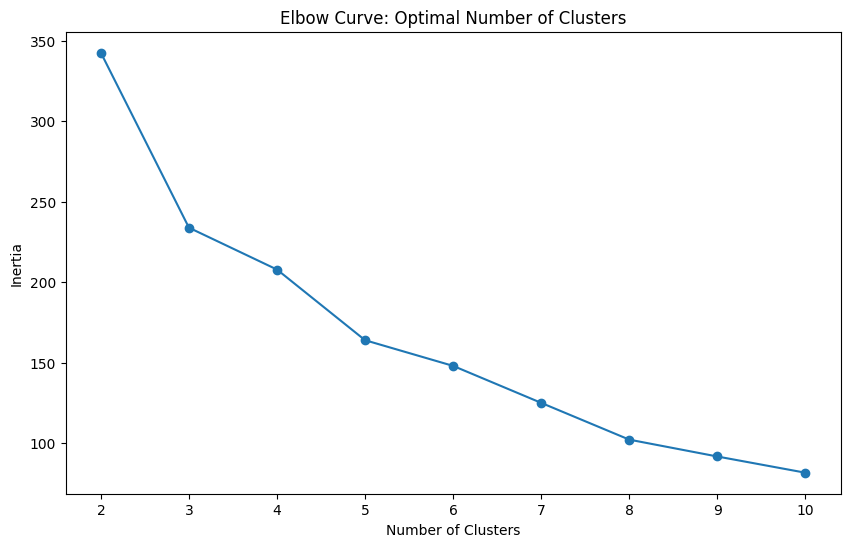

In [35]:

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Curve: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


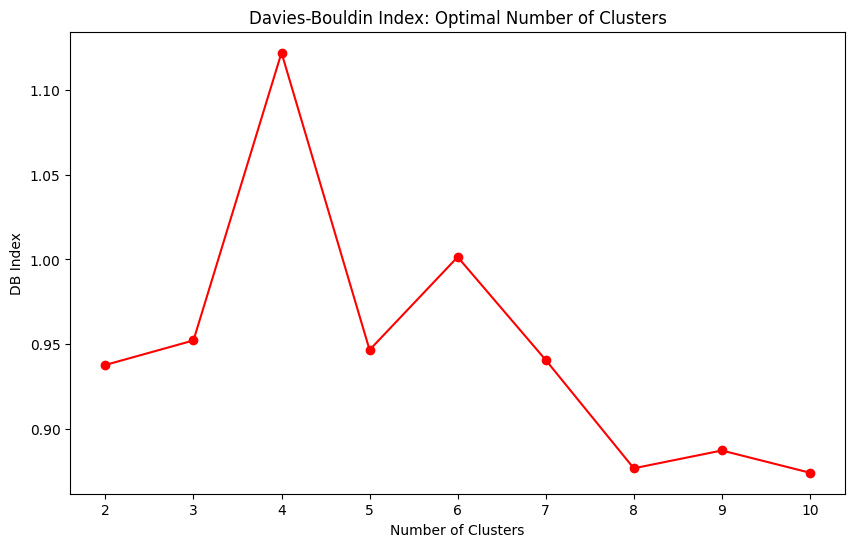

In [36]:

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()


Clustering with Optimal k

In [37]:
# Step 4: Apply KMeans with the chosen number of clusters (e.g., 3)
optimal_clusters = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the original data
customer_features['Cluster'] = clusters



# Davies-Bouldin Index for the final clusters
final_db_index = davies_bouldin_score(clustering_data_scaled, clusters)
print(f"Davies-Bouldin Index for {optimal_clusters} clusters: {final_db_index}")


Davies-Bouldin Index for 3 clusters: 0.95227765676549


Visualize Clusters

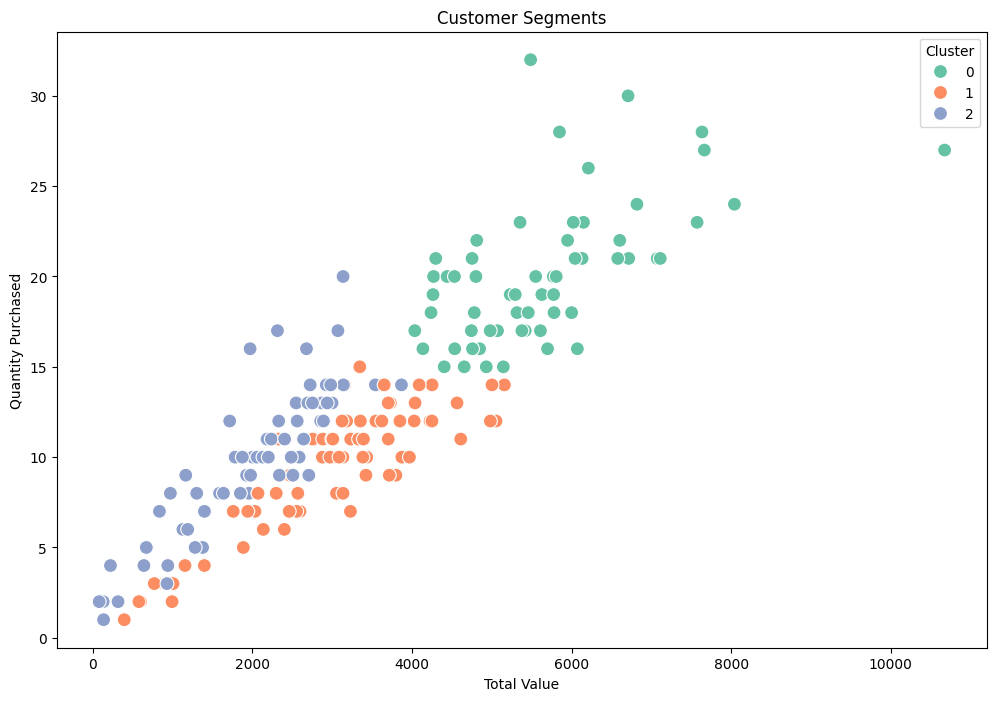

In [38]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=customer_features['TotalValue'],
    y=customer_features['Quantity'],
    hue=customer_features['Cluster'],
    palette="Set2",
    s=100
)
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Quantity Purchased")
plt.legend(title="Cluster")
plt.show()

 Save Results

In [39]:
# Save the clustering results to a CSV file
customer_features.to_csv("Bhuvana_Samala_ClusteringResults.csv", index=False)

# Display the first few rows of the results
print("Clustering results:")
print(customer_features.head())


Clustering results:
  CustomerID  TotalValue  Quantity  ProductPrice  Cluster
0      C0001     3354.52        12    278.334000        1
1      C0002     1862.74        10    208.920000        2
2      C0003     2725.38        14    195.707500        2
3      C0004     5354.88        23    240.636250        0
4      C0005     2034.24         7    291.603333        1
